In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest 
import seaborn as sns
import datetime as dt
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import csv

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
btc = pd.read_csv('./baseline_def_kaggle.csv')
btc = btc.drop(['market', 'volume', 'close_ratio', 'spread'], axis = 1)
btc

,Unnamed: 0,open,high,low,close,prevClose,8 Day Rolling Mean,8 Day SD,percentChange,isEvent based on 2SD,Naive Percent Event
0,0,763.28,777.51,713.60,735.07,735.07,763.82500,32.046036,0.000000,0,0
1,1,737.98,747.06,705.35,727.83,735.07,763.82500,32.046036,-0.009849,0,0
2,2,728.05,748.61,714.44,745.05,727.83,763.82500,32.046036,0.023659,0,0
3,3,741.35,766.60,740.24,756.13,745.05,763.82500,32.046036,0.014871,0,0
4,4,760.32,760.58,738.17,754.01,756.13,763.82500,32.046036,-0.002804,0,0
5,5,754.97,775.35,754.97,771.40,754.01,763.82500,32.046036,0.023063,0,0
6,6,773.44,820.31,767.21,802.39,771.40,763.82500,32.046036,0.040174,0,0
7,7,802.85,834.15,789.12,818.72,802.39,763.82500,32.046036,0.020352,0,0
8,8,823.27,859.51,801.67,859.51,818.72,779.38000,44.048259,0.049822,0,0
9,9,858.55,952.40,854.52,933.53,859.51,805.09250,64.804654,0.086119,0,1


In [3]:
btc.describe()

,Unnamed: 0,open,high,low,close,prevClose,8 Day Rolling Mean,8 Day SD,percentChange,isEvent based on 2SD,Naive Percent Event
count,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,899.000000,2561.064069,2637.460067,2474.643702,2562.815481,2560.845620,2556.426488,135.384506,0.001757,0.056142,0.057810
std,519.470885,3574.098055,3705.964702,3412.729018,3573.821245,3573.851505,3561.744441,286.392216,0.039359,0.230260,0.233449
min,0.000000,176.900000,211.730000,171.510000,178.100000,178.100000,207.210000,1.173723,-0.211458,0.000000,0.000000
25%,449.500000,390.615000,402.275000,380.665000,390.000000,390.000000,390.272500,7.722106,-0.012113,0.000000,0.000000
50%,899.000000,631.880000,642.100000,622.400000,632.000000,632.000000,631.317500,21.414479,0.001644,0.000000,0.000000
75%,1348.500000,4127.225000,4244.350000,3960.795000,4141.165000,4126.875000,4110.423125,122.389325,0.017163,0.000000,0.000000
max,1798.000000,19475.800000,20089.000000,18974.100000,19497.400000,19497.400000,17952.950000,2716.213301,0.252472,1.000000,1.000000


Text(0,0.5,'Price of Bitcoin')

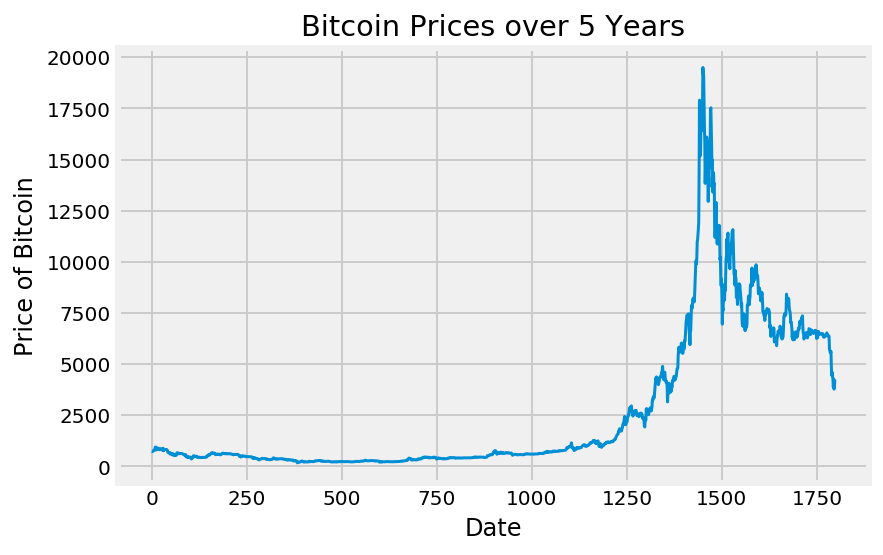

In [4]:
plt.plot(btc['close'], linewidth=1.5)
plt.title('Bitcoin Prices over 5 Years')
plt.xlabel('Date')
plt.ylabel('Price of Bitcoin')

## Isolation Forest

In [5]:
data = btc[['close']]
outliers_fraction=0.05
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
btc['anomaly'] = pd.Series(model.predict(data))

In [6]:
btc['anomaly'] = btc['anomaly'].apply(lambda x: x == -1)
btc['anomaly'] = btc['anomaly'].astype(int)
btc['anomaly'].value_counts()

0    1709
1      90
Name: anomaly, dtype: int64

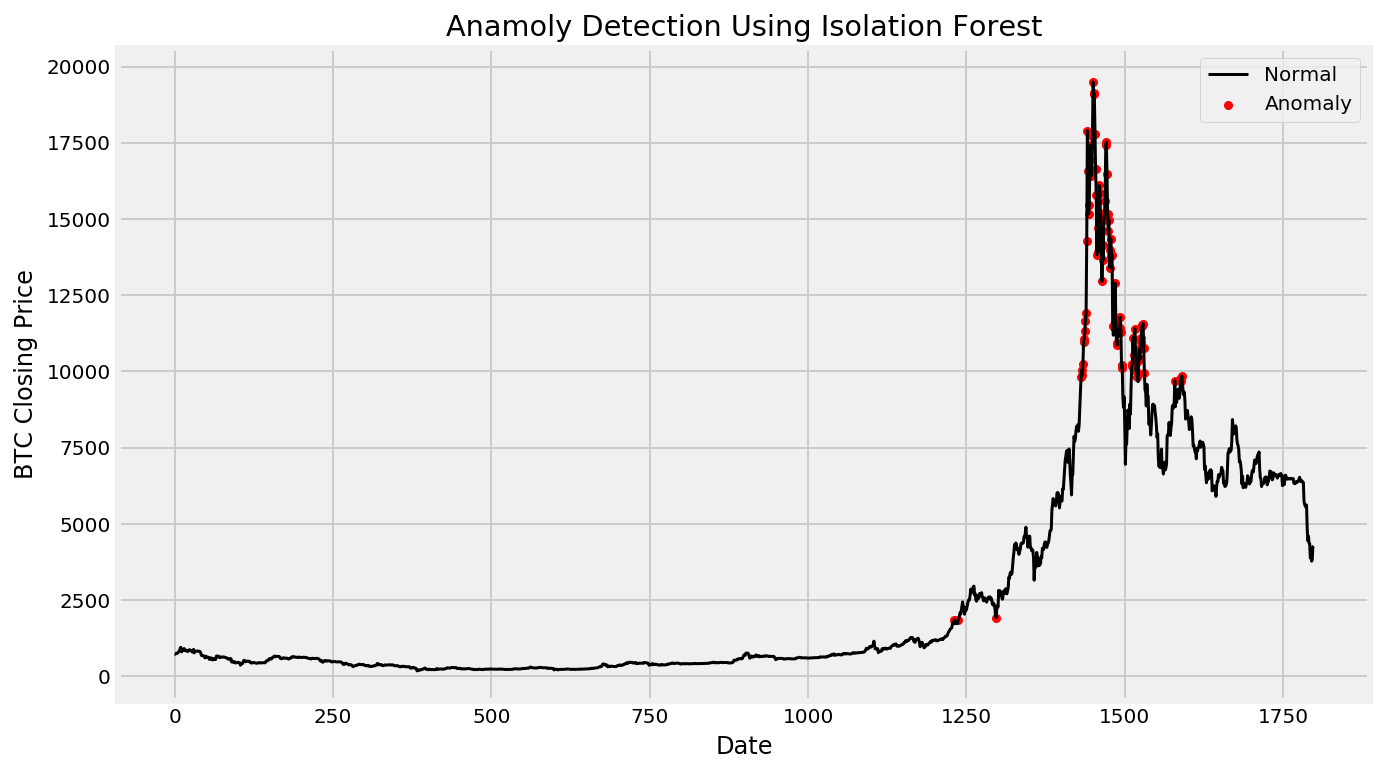

In [7]:
# visualization
fig, ax = plt.subplots(figsize=(10,6))

#anomaly
a = btc.loc[btc['anomaly'] == 1]
ax.plot(btc['close'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['close'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Isolation Forest")
plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.show();

In [8]:
btc['anomaly'].to_csv('isEvent_IsolationForest.csv')